In [3]:
import seaborn as sns
import scipy
import numpy as np
from matplotlib import pyplot as plt
import imageio
from IPython.display import Image, display
from matplotlib.colors import Normalize
import pandas as pd
import os
import matplotlib.colors as colors

In [1]:
path = "/home/smauran/Developpement/QG_standalone_counillon_assim4pdt/analyse_R5_seuil10_infl102_3/"

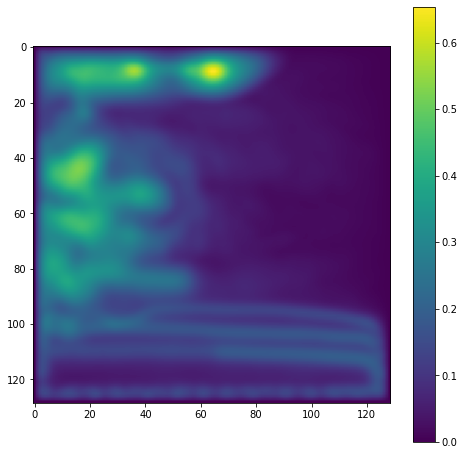

In [4]:
file_paths_truth = [
    f"{path}truth/truth_{i}.npy" for i in range(150, 1001, 5)
]
arrays_truth = [np.load(file_path) for file_path in file_paths_truth]

evol_qg = np.array(arrays_truth)

var_temp = np.std(evol_qg, axis =0)/np.mean(np.var(evol_qg, axis =0))


var_temp = var_temp.reshape((129, 129),order='F')
plt.figure(figsize=(8,8))
plt.imshow(var_temp)
plt.colorbar()

plt.savefig(path+"var_temp.eps", format='eps')

0.006885465860440829
0.010272502471668778


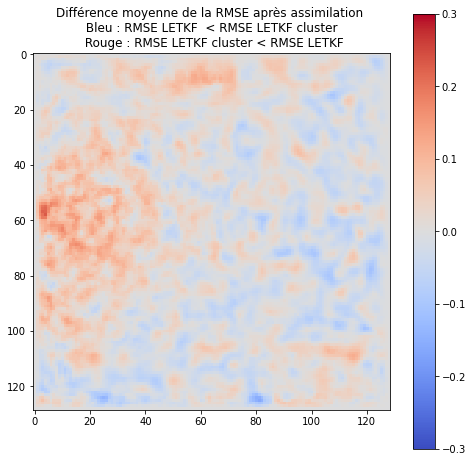

In [12]:
mean_diff = np.load(path+"mean_diff_3xp.npy")

mean_diff_ponderee = mean_diff*(1+var_temp)

mean_tot = np.sum(mean_diff_ponderee)
print(np.sum(mean_diff)/(129*129))
print(mean_tot/(129*129))

cmap = plt.get_cmap('coolwarm')

# Normaliser pour centrer sur 0
norm = colors.TwoSlopeNorm(vmin=mean_diff_ponderee.min(), vcenter=0, vmax=mean_diff_ponderee.max())

plt.figure(figsize=(8,8))
# Créer une image avec plt.imshow
plt.imshow(mean_diff, cmap=cmap, vmin = -0.3, vmax = 0.3, interpolation='nearest')
#plt.imshow(mean_diff_ponderee, cmap=cmap,norm = norm, interpolation='nearest')

# Ajouter une barre de couleur
plt.colorbar()

# Afficher le graphique
plt.title(f"Différence moyenne de la RMSE après assimilation \n Bleu : RMSE LETKF  < RMSE LETKF cluster \n Rouge : RMSE LETKF cluster < RMSE LETKF")
plt.savefig(path+"diff_rmse_moyenne_ponderee.png")
plt.show()

In [40]:
from PIL import Image, ImageEnhance

# Charger les deux images
background = Image.open(path+"diff_rmse_moyenne_sans_colorbar.png")
foreground = Image.open(path+"var_temp.png")

enhancer = ImageEnhance.Brightness(foreground)
foreground_mod = enhancer.enhance(1.5)

# Convertir l'image de premier plan en mode RGBA (si elle ne l'est pas déjà) pour gérer la transparence
foreground_mod = foreground_mod.convert('RGBA')

# Appliquer la transparence à l'image de premier plan (valeur entre 0 et 255)
transparency = 50  # Exemple : 128 pour 50% de transparence
foreground_mod.putalpha(transparency)

# Superposer les images (0, 0) est la position du coin supérieur gauche de l'image de fond
superposed_image = background.copy()
superposed_image.paste(foreground_mod, (0, 0), foreground_mod)

# Créer une nouvelle image pour mettre les deux images côte à côte
width, height = superposed_image.size
combined_width = width * 3
combined_image = Image.new('RGBA', (combined_width, height))

# Coller les images côte à côte
combined_image.paste(superposed_image, (0, 0))
combined_image.paste(background, (width, 0))
combined_image.paste(foreground, (2*width, 0))

# Sauvegarder le résultat
combined_image.save(path+'superposition_diffrmse_spreaddyn.png')

# Afficher l'image résultante
combined_image.show()

